## Lab Problem 07 - Polynomial Regression

Name: Arfan Ahmed <br>
ID: 2002040 <br>
Registrtion No: 09557 <br>

### Algorithm for implementation of polynomial and multiple linear regression.
Step 1: Input order of polynomial to be fit, m. <br>
Step 2: Input number of data points, n. <br>
Step 3: If n < m + 1, print out an error message that regression is impossible and terminate the process. If n ≥ m + 1, continue. <br>
Step 4: Compute the elements of the normal equation in the form of an augmented matrix. <br>
Step 5: Solve the augmented matrix for the coefficients a0, a1, a2, . . . , am using an elimination method. <br>
Step 6: Print out the coefficients. <br>

### Problem Statement. 
#### Fit a second-order polynomial to the data in the first two columns of Table 17.4.

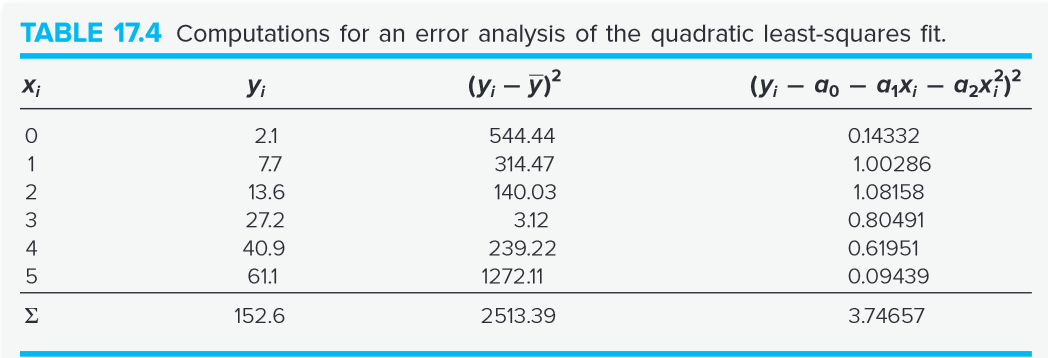

   X_i       Y_i   (Y_i - avgY)^2
[[0.00000000e+00 2.10000000e+00 5.44444444e+02]
 [1.00000000e+00 7.70000000e+00 3.14471111e+02]
 [2.00000000e+00 1.36000000e+01 1.40027778e+02]
 [3.00000000e+00 2.72000000e+01 3.12111111e+00]
 [4.00000000e+00 4.09000000e+01 2.39217778e+02]
 [5.00000000e+00 6.11000000e+01 1.27211111e+03]]


a0 = 2.47857 	 a1 = 2.35929 	 a2 = 1.86071

Equation is y = 2.47857 + 2.35929x + 1.86071x^2


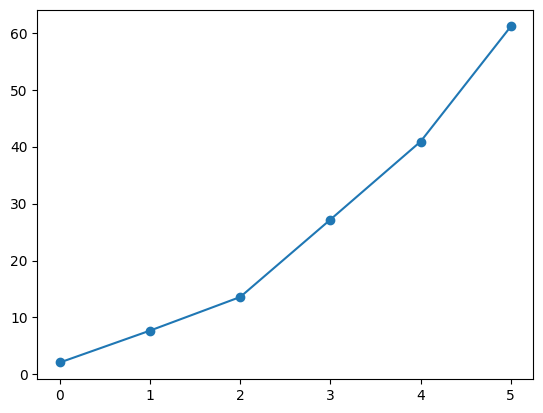

In [24]:
import numpy as np 
import matplotlib.pyplot as plt 

# adding dataset
X = np.array([[0], [1], [2], [3], [4], [5]])
Y = np.array([[2.1], [7.7], [13.6], [27.2], [40.9], [61.1]])

# input order of polynomial and number of data points
m = 2
n = len(X)

def computeNormalEquations(X, Y, m, n):
  sumOfX_i = np.sum(X)
  sumOfY_i = np.sum(Y)
  avgX = (sumOfX_i / n)
  avgY = (sumOfY_i / n)
  sumOfX_i2 = np.sum(X**2)
  sumOfX_i3 = np.sum(X**3)
  sumOfX_i4 = np.sum(X**4)
  sumOfX_iY_i = np.sum(X * Y)
  sumOfX_i2Y_i = np.sum(X**2 * Y)
  
  equationMatrix = np.array([[n, sumOfX_i, sumOfX_i2],
                             [sumOfX_i, sumOfX_i2, sumOfX_i3],
                             [sumOfX_i2, sumOfX_i3, sumOfX_i4]])
  answerMatrix = np.array([[sumOfY_i], [sumOfX_iY_i], [sumOfX_i2Y_i]])

  solutionMatrix = np.linalg.solve(equationMatrix, answerMatrix)

  a0 = solutionMatrix[0][0]
  a1 = solutionMatrix[1][0]
  a2 = solutionMatrix[2][0]

  col3 = ((Y - avgY))**2

  table = np.hstack([X, Y, col3])

  return a0, a1, a2, table

def plotting(X, Y):
  xPoints = X.flatten()
  yPoints = Y.flatten()

  plt.scatter(xPoints, yPoints)
  plt.plot(xPoints, yPoints)
  plt.show()


if (n < (m + 1)):
  print("Regression is impossible!")
elif (n >= (m + 1)):
  a0, a1, a2, table = computeNormalEquations(X, Y, m, n)
  
  print("   X_i       Y_i   (Y_i - avgY)^2")
  #np.set_printoptions(suppress=True,precision=3)
  print(table)
  print("\n")
  print(f"a0 = {a0:.5f} \t a1 = {a1:.5f} \t a2 = {a2:.5f}")
  print(f"\nEquation is y = {a0:.5f} + {a1:.5f}x + {a2:.5f}x^2")
  plotting(X, Y)
  


# np.set_printoptions(suppress=True,precision=3)